<a href="https://colab.research.google.com/github/toraaglobal/Case_Studies/blob/master/text_restaurant_reviews_text_documents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Restaurant Reviews





In [0]:
## Textmining Naive Bayes Example
import nltk
import pandas as pd
import sklearn
import re  
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
## For Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import os
import numpy as np

from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import string

In [0]:
#Mount the gdrive
from google.colab import drive
drive.mount('/content/drive')


#change directry to the gdrive
os.chdir('./drive/My Drive/Colab Notebooks/code')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
## Read data from csv

## Step 1: Read in the file
## We cannot read it in as csv because it is a mess
## One option is to convert it to text.

RawfileName="../data/deception_data_converted_final.csv"
FILE=open(RawfileName,"r")


In [0]:
## We are going to clean it and then write it back to csv!
## So, we need an empty csv file - let's make one....
filename="../data/CleanText.csv"
NEWFILE=open(filename,"w")
## In the first row, create a column called Label and a column Text...
ToWrite="Lie_Label,Senti_Label,Text\n"
## Write this to new empty cs v file
NEWFILE.write(ToWrite)
## Close it up
NEWFILE.close()

In [0]:
### Now, we have an empty csv file called CLeanText.csv
### Above we created the first row of column names: Label and Text
### Next, we will open this file for "a" or append - so we can
### add things to it from where we left off
### NOTE: If you open this file again with "w" it will write over
### whatever is in the file!  USE "a"....
### This line of code opens the file for append and creates
### a variable (NEWFILE) that we can use to access and control the
### file.
NEWFILE=open(filename, "a")

### We also will build a CLEAN dataframe.
### So for now, we need a blank one...
MyFinalDF=pd.DataFrame()

In [0]:
###############################
## IMPORTANT
##
## Below, we will create a lot of 
## prints and outputs that we want to see
## Let's write them all to a file so
## we can see what our code is doing
###################################
OutputFile="../data/MyOutputFile.txt"
## There are many ways to do this...
## I prefer to open the file with "w" to
## create it. Then, close and reopen with "a" to
## write to it. 
## You can also use with open, etc
OUTFILE=open(OutputFile,"w")
OUTFILE.close()
OUTFILE=open(OutputFile,"a") ### REMEMBER to close this below....

In [0]:
### 
### Let's go through it one row at a time....

# %%

for row in FILE:
    RawRow="\n\nThe row is: " + row +"\n"
    OUTFILE.write(RawRow) ## I am going to write this later again for comp
    row=row.lstrip()  ## strip all spaces from the left
    row=row.rstrip()  ## strip all spaces from the right
    row=row.strip()   ## strip all extra spaces in general
    row=row.replace(","," ")
    #print(row)
    ## Split up the row of text by space - TOKENIZE IT into a LIST
    Mylist=row.split(" ")
    
    #print(Mylist)
    ## Now, we will clean this list (row)
    ## We will place the results (cleaned) into a new list
    ## Therefore, we need to build a new empty list...
    NewList=[]
    
    for word in Mylist:
        #print("The next word is: ", word)
        PlaceInOutputFile = "The next word BEFORE is: " +  word + "\n"
        OUTFILE.write(PlaceInOutputFile)
        word=word.lower()
        word=word.lstrip()
        #word=word.strip("\n")
        #word=word.strip("\\n")
        word=word.replace(","," ")
        word=word.replace(" ","")
        word=word.replace("_","")
        word=re.sub('\+', ' ',word)
        word=re.sub('.*\+\n', '',word)
        word=re.sub('zz+', ' ',word)
        word=word.replace("\t","")
        word=word.replace(".","")
        #word=word.replace("\'s","")
        word=word.lstrip()
        word=word.rstrip()
        word=word.strip()
        
        #word.replace("\","")
        if word not in ["", "\\", '"', "'", "*", ":", ";"]:
            if len(word) >= 1:
                if not re.search(r'\d', word): ##remove digits
                    NewList.append(word)
                    PlaceInOutputFile = "The next word AFTER is: " +  word + "\n"
                    OUTFILE.write(PlaceInOutputFile)
        
        
    #print(NewList)    
    
    #print(NewList[-1])  ## what is this??? Its the last element
    ## What is the last element?? Its the label!

       ## Labels for our data set <------------!!!!!!!!!!!!!!!!!!!!!!!! 
    llabel=NewList[0]
    if "f" in llabel:
        llabel="truth"
    else:
        llabel="lie"
        
    slabel=NewList[1]
    if "n" in slabel:
        slabel="neg"
    else:
        slabel="pos"
    ## -------------------------------------------------------------------
    PlaceInOutputFile = "\nThe label is: " +  llabel + "  "+ slabel +"\n"
    OUTFILE.write(PlaceInOutputFile)
    
    NewList.pop(0) ## removes first item
    NewList.pop(0) ## removes first item
    Text=" ".join(NewList)
    
    #PlaceInOutputFile = "\nThe text  is: " +  Text + "\n"
    #OUTFILE.write(PlaceInOutputFile)
    #print(Text)
    
    #print("LABEL\n")
    #print(label)
    
    ### More cleaning....
    Text=Text.replace("\\n","")
    Text=Text.strip("\\n")
    Text=Text.replace("\\'","")
    Text=Text.replace("\\","")
    Text=Text.replace('"',"")
    Text=Text.replace("'","")
    Text=Text.replace("s'","")
    Text=Text.lstrip()
    
    #if len(Text) < 2:
     #   print("SMALL",Text)
    #print(type(Text))
    #print(Text)
    
    ## Create the string you want to write to the NEWFILE...
    OriginalRow="ORIGINAL" + RawRow
    OUTFILE.write(OriginalRow)
    ToWrite=llabel+","+slabel+","+Text+"\n"
    NEWFILE.write(ToWrite)
    
    
    OUTFILE.write(ToWrite)
    
    
## CLOSE files - always close files!
FILE.close()  
NEWFILE.close()
OUTFILE.close()



In [0]:
## Read the new csv file you created into a DF or into CounterVectorizer
#######
## recall that filename is CleanFile.csv - the file we just made
## Into DF
MyTextDF=pd.read_csv(filename)
## remove any rows with NA
MyTextDF = MyTextDF.dropna(how='any',axis=0)  ## axis 0 is rowwise
print(MyTextDF.head())
#print(MyTextDF["Label"])
#print(MyTextDF.iloc[1,1])

  Lie_Label Senti_Label                                               Text
0       lie         neg                                             review
1     truth         neg  mikes pi a high point ny service was very slow...
2     truth         neg  i really like this buffet restaurant in marsha...
3     truth         neg  after i went shopping with some of my friend w...
4     truth         neg  olive oil garden was very disappointing i expe...


In [0]:

## KEEP THE LABELS!
MyLieLabel = MyTextDF["Lie_Label"]
MySentiLabel = MyTextDF["Senti_Label"]
## Remove the labels from the DF
DF_noLabel= MyTextDF.drop(["Lie_Label"], axis=1)  #axis 1 is column
DF_noLabel= DF_noLabel.drop(["Senti_Label"], axis=1)
#print(DF_noLabel.head())
## Create a list where each element in the list is a row from
## the file/DF
print(DF_noLabel)
print("length: ", len(DF_noLabel))
# %%

                                                 Text
0                                              review
1   mikes pi a high point ny service was very slow...
2   i really like this buffet restaurant in marsha...
3   after i went shopping with some of my friend w...
4   olive oil garden was very disappointing i expe...
5   the seven heaven restaurant was never known fo...
6   i went to xyz restaurant and had a terrible ex...
7   i went to abc restaurant two days ago and i ha...
8   i went to the chilis on erie blvd and had the ...
9   omg this restaurant is horrible the receptioni...
10  yesterday i went to a casino-restaurant called...
11  last weekend i went to a place called ratastic...
12  i once went to chipotle at marshall street to ...
13  i entered the restaurant and a waitress came b...
14  carlos plate shack was the worst dining experi...
15  this is the last place you would want to dine ...
16  in each of the diner dish there are at least o...
17  i went there with two fr

In [0]:

### BUILD the LIST that "content" in CountVectorizer will expect

MyList=[]  #empty list
for i in range(0,len(DF_noLabel)):
    NextText=DF_noLabel.iloc[i,0]  ## what is this??
    ## PRINT TO FIND OUT!
    #print(MyTextDF.iloc[i,1])
    #print("Review #", i, "is: ", NextText, "\n\n")
    #print(type(NextText))
    ## This list is a collection of all the reviews. It will be HUGE
    MyList.append(NextText)

## see what this list looks like....
print(MyList[0:4])


['review', 'mikes pi a high point ny service was very slow and the quality was low you would think they would know at least how to make good pi a not stick to pre-made dishes like stuffed pasta or a salad you should consider dining else where', 'i really like this buffet restaurant in marshall street they have a lot of selection of american japanese and chinese dishes we also got a free drink and free refill there are also different kinds of dessert the staff is very friendly it is also quite cheap compared with the other restaurant in syracuse area i will definitely coming back here', 'after i went shopping with some of my friend we went to dodo restaurant for dinner i found worm in one of the dishes']


In [0]:
MycountVect = CountVectorizer(input="content")

CV = MycountVect.fit_transform(MyList)

MyColumnNames=MycountVect.get_feature_names()
VectorizedDF_Text=pd.DataFrame(CV.toarray(),columns=MyColumnNames)
## Note - this DF starts at row 0 (not 1)
## My labels start at 1 so I need to shift by 1
print(VectorizedDF_Text.head())

   abc  about  abruptly  absolutely  acceptable  accord  acknowledge  across  \
0    0      0         0           0           0       0            0       0   
1    0      0         0           0           0       0            0       0   
2    0      0         0           0           0       0            0       0   
3    0      0         0           0           0       0            0       0   
4    0      0         0           0           0       0            0       0   

   actual  actually  ...  yeah  yelp  yesterday  york  you  youll  your  \
0       0         0  ...     0     0          0     0    0      0     0   
1       0         0  ...     0     0          0     0    2      0     0   
2       0         0  ...     0     0          0     0    0      0     0   
3       0         0  ...     0     0          0     0    0      0     0   
4       0         0  ...     0     0          0     0    0      0     0   

   youre  yourself  yuenan  
0      0         0       0  
1      0  

In [0]:
### Put the labels back
## Make copy
#print(MyLieLabel)
#print(type(MyLieLabel))  

NEW_Labels = MyLieLabel.to_frame()   #index to 0
#print(type(NEW_Labels))

NEW_Labels.index =NEW_Labels.index-1
#print(NEW_Labels)

LabeledCLEAN_DF=VectorizedDF_Text
LabeledCLEAN_DF["Lie LABEL"]=NEW_Labels
print(LabeledCLEAN_DF.head())


   abc  about  abruptly  absolutely  acceptable  accord  acknowledge  across  \
0    0      0         0           0           0       0            0       0   
1    0      0         0           0           0       0            0       0   
2    0      0         0           0           0       0            0       0   
3    0      0         0           0           0       0            0       0   
4    0      0         0           0           0       0            0       0   

   actual  actually  ...  yelp  yesterday  york  you  youll  your  youre  \
0       0         0  ...     0          0     0    0      0     0      0   
1       0         0  ...     0          0     0    2      0     0      0   
2       0         0  ...     0          0     0    0      0     0      0   
3       0         0  ...     0          0     0    0      0     0      0   
4       0         0  ...     0          0     0    0      0     0      0   

   yourself  yuenan  Lie LABEL  
0         0       0      trut

In [0]:
### Put the labels back
## Make copy
#print(MySentiLabel)
#print(type(MySentiLabel))  

NEW_Labels = MySentiLabel.to_frame()   #index to 0
#print(type(NEW_Labels))

NEW_Labels.index =NEW_Labels.index-1
#print(NEW_Labels)

LabeledCLEAN_DF=VectorizedDF_Text
LabeledCLEAN_DF["Senti LABEL"]=NEW_Labels
print(LabeledCLEAN_DF.head())

   abc  about  abruptly  absolutely  acceptable  accord  acknowledge  across  \
0    0      0         0           0           0       0            0       0   
1    0      0         0           0           0       0            0       0   
2    0      0         0           0           0       0            0       0   
3    0      0         0           0           0       0            0       0   
4    0      0         0           0           0       0            0       0   

   actual  actually  ...  yesterday  york  you  youll  your  youre  yourself  \
0       0         0  ...          0     0    0      0     0      0         0   
1       0         0  ...          0     0    2      0     0      0         0   
2       0         0  ...          0     0    0      0     0      0         0   
3       0         0  ...          0     0    0      0     0      0         0   
4       0         0  ...          0     0    0      0     0      0         0   

   yuenan  Lie LABEL  Senti LABEL  
0 

In [0]:

### First create Train and Test Sets.  < ----!!!!!!!!!!!!!!!!!!!

NegSent_DF = LabeledCLEAN_DF[(LabeledCLEAN_DF["Senti LABEL"] == "neg")]
PosSent_DF = LabeledCLEAN_DF[(LabeledCLEAN_DF["Senti LABEL"] == "pos")]


## Create the testing set - grab a sample from the training set. 
## Be careful. Notice that right now, our train set is sorted by label.
## If your train set is large enough, you can take a random sample.
from sklearn.model_selection import train_test_split

TrainNegDF, TestNegDF = train_test_split(NegSent_DF, test_size=0.3)
TrainPosDF, TestPosDF = train_test_split(PosSent_DF, test_size=0.3)

TrainDF = pd.concat([TrainNegDF, TrainPosDF])
TestDF = pd.concat([TestNegDF, TestPosDF])

# %%

In [0]:
## Now we have a training set and a testing set. 
print("The training set is:")
print(TrainDF.head())
print("The testing set is:")
print(TestDF.head())

## IMPORTANT - YOU CANNOT LEAVE LABELS ON THE TEST SET
## Save labels
TestLabels=TestDF["Senti LABEL"]
#print(TestLabels)
## remove labels
TestDF = TestDF.drop(["Senti LABEL"], axis=1)
TestDF = TestDF.drop(["Lie LABEL"], axis=1)
TrainDF = TrainDF.drop(["Lie LABEL"], axis=1)
print(TestDF.head())

The training set is:
    abc  about  abruptly  absolutely  acceptable  accord  acknowledge  across  \
29    0      0         0           0           0       0            0       0   
26    0      0         0           0           0       0            0       0   
11    0      0         0           0           0       0            0       0   
41    0      0         0           0           0       0            0       0   
1     0      0         0           0           0       0            0       0   

    actual  actually  ...  yesterday  york  you  youll  your  youre  yourself  \
29       0         1  ...          0     0    2      0     0      0         0   
26       0         0  ...          0     0    0      0     0      0         0   
11       0         0  ...          0     0    0      0     0      0         0   
41       0         0  ...          0     0    0      0     0      0         0   
1        0         0  ...          0     0    2      0     0      0         0   

    y

In [0]:
# %%
####################################################################
########   Predict Using  Naive Bayes ############################
####################################################################
from sklearn.naive_bayes import MultinomialNB
#https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB.fit
#Create the modeler
MyModelNB= MultinomialNB()
## When you look up this model, you learn that it wants the 
## DF seperate from the labels
TrainDF_nolabels=TrainDF.drop(["Senti LABEL"], axis=1)
#TrainDF_nolabels=TrainDF_nolabels.drop(["Lie LABEL"], axis=1)
print(TrainDF_nolabels)
TrainLabels=TrainDF["Senti LABEL"]
print(TrainLabels)
MyModelNB.fit(TrainDF_nolabels, TrainLabels)
Prediction = MyModelNB.predict(TestDF)
print("The prediction from NB is:")
print(Prediction)
print("The actual labels are:")
print(TestLabels)

    abc  about  abruptly  absolutely  acceptable  accord  acknowledge  across  \
29    0      0         0           0           0       0            0       0   
26    0      0         0           0           0       0            0       0   
11    0      0         0           0           0       0            0       0   
41    0      0         0           0           0       0            0       0   
1     0      0         0           0           0       0            0       0   
20    0      1         0           0           0       0            0       0   
28    0      0         0           0           0       0            0       0   
22    0      1         0           0           0       0            0       0   
23    0      0         0           0           0       0            0       0   
10    0      0         0           0           0       0            0       0   
40    0      1         0           0           0       0            0       0   
25    0      0         0    

In [0]:

## Which Features are most important????!?!

# %%
featLogProb = []
ind = 0
for feats in TrainDF_nolabels.columns:
    ## the following line takes the difference of the log prob of feature given model
    ## thus it measure the importance of the feature for classification.
    featLogProb.append(abs(MyModelNB.feature_log_prob_[1,ind] - MyModelNB.feature_log_prob_[0,ind]))
    s = ""
    s += (feats)
    s +="  " 
    s += str(featLogProb[ind])
    s += "\n" 
    print(s)
    ind = ind + 1

#%%

abc  0.12874500796033672

about  0.7875457239138184

abruptly  0.12874500796033672

absolutely  0.8218921885202821

acceptable  0.5644021725996087

accord  0.8218921885202821

acknowledge  0.5644021725996087

across  0.12874500796033672

actual  0.12874500796033672

actually  0.5644021725996087

ad  0.8218921885202821

add  0.5342101160685013

additional  0.5644021725996087

adorable  0.12874500796033672

affordable  0.12874500796033672

aforementioned  0.12874500796033672

after  0.7185528524268667

afternoon  0.8218921885202821

again  0.02540567186692222

aghast  0.5644021725996087

ago  0.8218921885202821

agreed  0.12874500796033672

air  0.12874500796033672

albert  0.12874500796033672

alfredo  0.12874500796033672

all  0.15893706449144496

almost  0.9698672807077733

along  0.8218921885202821

already  0.2767201001478279

also  0.8218921885202812

although  0.5644021725996087

always  2.208186549640173

am  0.9698672807077733

amazing  2.4313301009543826

ambiance  0.8218921885

In [0]:
#feats_sorted = sorted(featLogProb , reverse = True)
    ## Sort features based on importance!
sort_inds = sorted(range(len(featLogProb)), key=featLogProb.__getitem__, reverse = True)
for i in range(20):
    s = ""
    s += TrainDF_nolabels.columns[sort_inds[i]]
    s += ":  "
    s += str(featLogProb[sort_inds[i]])
    s += "\n"
    print(s)


amazing:  2.4313301009543826

always:  2.208186549640173

just:  2.173840085033709

our:  2.173840085033709

chinese:  2.07465515701565

best:  2.0746551570156493

come:  2.0684795693758833

terrible:  2.0684795693758833

asked:  1.9506965337194995

said:  1.9506965337194995

cream:  1.9205044771883912

friendly:  1.9205044771883912

ice:  1.9205044771883912

japanese:  1.9205044771883912

noodle:  1.9205044771883912

coffee:  1.7381829203944372

great:  1.7381829203944372

love:  1.7381829203944372

makes:  1.7381829203944372

soup:  1.7381829203944372



In [0]:

## How Accurate was the Model ... confusion matrix
from sklearn.metrics import confusion_matrix
## The confusion matrix is square and is labels X labels
## We ahve two labels, so ours will be 2X2
#The matrix shows
## rows are the true labels
## columns are predicted
## it is al[habetical
## The numbers are how many 
## actual = (TestLabels == 'neg').tolist()
## predict = (Prediction == 'neg').tolist()
y_true = (TestLabels).tolist()
y_predict = (Prediction).tolist()
labels =['neg', 'pos']
cm = confusion_matrix(y_true, y_predict, labels)
print(cm)

[[12  2]
 [ 2 12]]


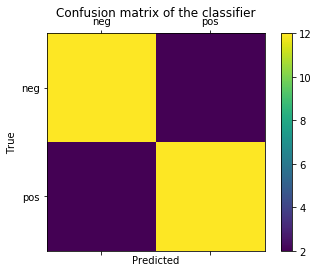

In [0]:

#import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)

ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Homework 4

In [0]:
## Textmining Naive Bayes Example
import nltk
import pandas as pd
import sklearn
import re  
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
## For Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import os
import numpy as np

from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import string

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
import seaborn as sns


nltk.download('stopwords')
nltk.download('punkt')

%matplotlib inline


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [0]:
## Load datasets

deception = pd.read_csv('../data/deception_data_converted_final.csv')

deception.head()

,lie,sentiment,review,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,f,n,'Mike\'s Pizza High Point,NY Service was very slow and the quality was ...,not. Stick to pre-made dishes like stuffed pa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,f,n,'i really like this buffet restaurant in Marsh...,japanese,and chinese dishes. we also got a free drink ...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,f,n,'After I went shopping with some of my friend,we went to DODO restaurant for dinner. I foun...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f,n,'Olive Oil Garden was very disappointing. I ex...,and the waitor had no manners whatsoever. Don...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,f,n,'The Seven Heaven restaurant was never known f...,never more. ',NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
## There are alot of columns with NAN values and no label
## we are interested in the first three columns, lie, sentiment and review


##check the columns
print(deception.columns)

Index(['lie', 'sentiment', 'review', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')


In [0]:
deception_sub = deception[['lie', 'sentiment', 'review']]
deception_sub.head()

,lie,sentiment,review
0,f,n,'Mike\'s Pizza High Point
1,f,n,'i really like this buffet restaurant in Marsh...
2,f,n,'After I went shopping with some of my friend
3,f,n,'Olive Oil Garden was very disappointing. I ex...
4,f,n,'The Seven Heaven restaurant was never known f...


In [0]:
## from the observation, the second two columns might also be part of the review
deception['review2'] = deception['review'].astype(str).str.cat(deception['Unnamed: 3'].astype(str), sep=' ')

deception.head()



,lie,sentiment,review,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,review2
0,f,n,'Mike\'s Pizza High Point,NY Service was very slow and the quality was ...,not. Stick to pre-made dishes like stuffed pa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,'Mike\'s Pizza High Point NY Service was very...
1,f,n,'i really like this buffet restaurant in Marsh...,japanese,and chinese dishes. we also got a free drink ...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,'i really like this buffet restaurant in Marsh...
2,f,n,'After I went shopping with some of my friend,we went to DODO restaurant for dinner. I foun...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,'After I went shopping with some of my friend ...
3,f,n,'Olive Oil Garden was very disappointing. I ex...,and the waitor had no manners whatsoever. Don...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,'Olive Oil Garden was very disappointing. I ex...
4,f,n,'The Seven Heaven restaurant was never known f...,never more. ',NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,'The Seven Heaven restaurant was never known f...


In [0]:
## columns that might have some reviews data 

col = ['Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23']


##concat
for c in col:
  deception['review2'] = deception['review2'].astype(str).str.cat(deception[c].astype(str), sep=' ')
  
deception.head()

,lie,sentiment,review,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,review2
0,f,n,'Mike\'s Pizza High Point,NY Service was very slow and the quality was ...,not. Stick to pre-made dishes like stuffed pa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,'Mike\'s Pizza High Point NY Service was very...
1,f,n,'i really like this buffet restaurant in Marsh...,japanese,and chinese dishes. we also got a free drink ...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,'i really like this buffet restaurant in Marsh...
2,f,n,'After I went shopping with some of my friend,we went to DODO restaurant for dinner. I foun...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,'After I went shopping with some of my friend ...
3,f,n,'Olive Oil Garden was very disappointing. I ex...,and the waitor had no manners whatsoever. Don...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,'Olive Oil Garden was very disappointing. I ex...
4,f,n,'The Seven Heaven restaurant was never known f...,never more. ',NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,'The Seven Heaven restaurant was never known f...


In [0]:
deception['review2'][0]

"'Mike\\'s Pizza High Point  NY Service was very slow and the quality was low. You would think they would know at least how to make good pizza  not. Stick to pre-made dishes like stuffed pasta or a salad. You should consider dining else where.' nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan"

In [0]:
## check the columns
deception.columns

Index(['lie', 'sentiment', 'review', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'review2'],
      dtype='object')

In [0]:
## select the review, lie and sentiment columns
decepDF = deception[['lie', 'sentiment', 'review2']]
decepDF.head()


,lie,sentiment,review2
0,f,n,'Mike\'s Pizza High Point NY Service was very...
1,f,n,'i really like this buffet restaurant in Marsh...
2,f,n,'After I went shopping with some of my friend ...
3,f,n,'Olive Oil Garden was very disappointing. I ex...
4,f,n,'The Seven Heaven restaurant was never known f...


In [0]:
## we have two labels for the customer review, the lie and sentiment
## check the number of categories for each label

print(decepDF['lie'].unique())

['f' 't']


In [0]:
print(decepDF['sentiment'].unique())

['n' 'p']


In [0]:
## we have two categories for the two labels


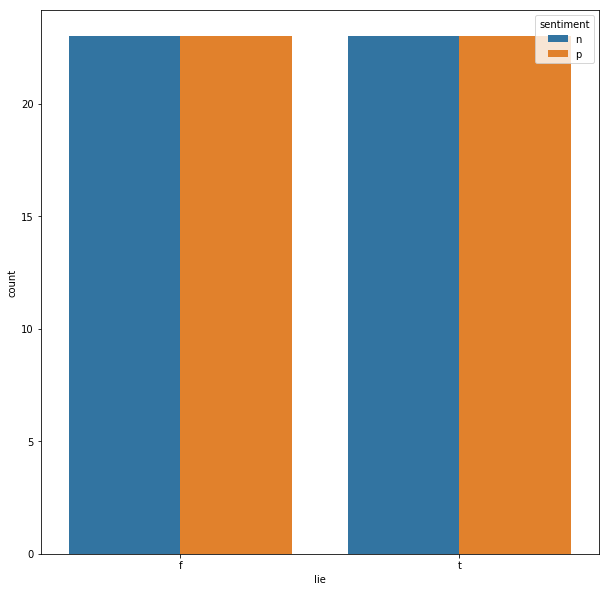

In [0]:
## 
plt.figure(figsize=(10,10))
sns.countplot(decepDF['lie'], hue=decepDF['sentiment'])

In [0]:
## The dataset is balanced across the target

allText = decepDF['review2'].values


In [0]:
allText[:5]

array(["'Mike\\'s Pizza High Point  NY Service was very slow and the quality was low. You would think they would know at least how to make good pizza  not. Stick to pre-made dishes like stuffed pasta or a salad. You should consider dining else where.' nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan",
       "'i really like this buffet restaurant in Marshall street. they have a lot of selection of american  japanese  and chinese dishes. we also got a free drink and free refill. there are also different kinds of dessert. the staff is very friendly. it is also quite cheap compared with the other restaurant in syracuse area. i will definitely coming back here.' nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan",
       "'After I went shopping with some of my friend  we went to DODO restaurant for dinner. I found worm in one of the dishes .' nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan",
       "'Olive 

In [0]:
newText = []

for line in allText:
    ### More cleaning....
    line=line.replace("\\n","")
    #print(line)
    line=line.strip("\\n")
    line=line.replace("\\'","")
    line=line.replace("\\","")
    line=line.replace('"',"")
    line=line.replace("'","")
    line=line.replace("s'","")
    line=line.lstrip()
    line =line.replace('nan','')
    line =line.replace('na','')
    line =line.replace('.','')
    line =line.replace('!','')
    line =line.replace('(','')
    line =line.replace(')','')
    #print(line)
    newText.append(line)
    
    
    
    
newText[:5]

['Mikes Pizza High Point  NY Service was very slow and the quality was low You would think they would know at least how to make good pizza  not Stick to pre-made dishes like stuffed pasta or a salad You should consider dining else where                   ',
 'i really like this buffet restaurant in Marshall street they have a lot of selection of american  japanese  and chinese dishes we also got a free drink and free refill there are also different kinds of dessert the staff is very friendly it is also quite cheap compared with the other restaurant in syracuse area i will definitely coming back here                   ',
 'After I went shopping with some of my friend  we went to DODO restaurant for dinner I found worm in one of the dishes                     ',
 'Olive Oil Garden was very disappointing I expect good food and good service at least when I go out to eat The meal was cold when we got it  and the waitor had no manners whatsoever Dont go to the Olive Oil Garden               

In [0]:
revdf = pd.DataFrame(newText)
revdf.head()

,0
0,Mikes Pizza High Point NY Service was very sl...
1,i really like this buffet restaurant in Marsha...
2,After I went shopping with some of my friend ...
3,Olive Oil Garden was very disappointing I expe...
4,The Seven Heaven restaurant was never known fo...


In [0]:
decepDF['newreview'] = revdf[:]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
decepDF.head()

,lie,sentiment,review2,newreview
0,f,n,'Mike\'s Pizza High Point NY Service was very...,Mikes Pizza High Point NY Service was very sl...
1,f,n,'i really like this buffet restaurant in Marsh...,i really like this buffet restaurant in Marsha...
2,f,n,'After I went shopping with some of my friend ...,After I went shopping with some of my friend ...
3,f,n,'Olive Oil Garden was very disappointing. I ex...,Olive Oil Garden was very disappointing I expe...
4,f,n,'The Seven Heaven restaurant was never known f...,The Seven Heaven restaurant was never known fo...


In [0]:
def generate_wordcloud(text, max_font_size=50, max_words=100, background_color="white"):
    '''generate word cloud from text '''
    wordcloud = WordCloud(max_font_size=max_font_size, max_words=max_words, background_color=background_color).generate(text)
    #display generated image
    plt.figure(figsize=(10,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    #figname = str(text) + '.png'
    #plt.savefig(figname)
    plt.show()

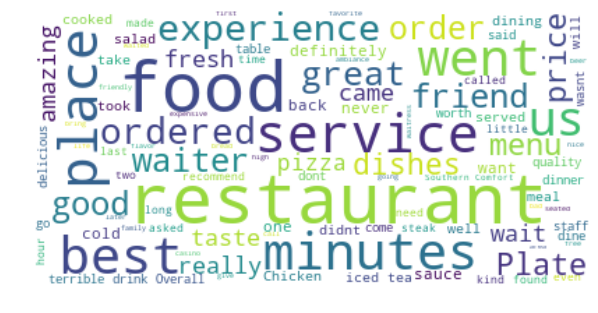

In [0]:
#create a wordclod of the false text
ftext = ''

#decepDF['newreview'][1]

for i in range(len(decepDF)):
  if decepDF['lie'][i] == 'f':
    ftext = ftext + decepDF['newreview'][i]
    
    
    
generate_wordcloud(ftext)

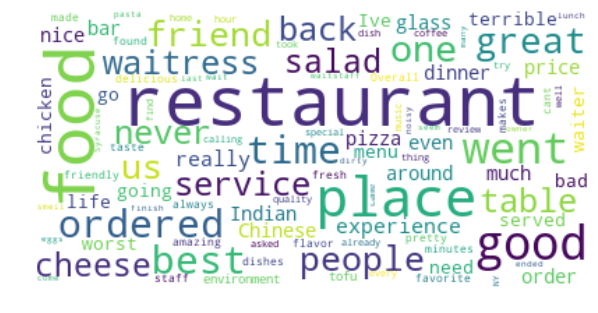

In [0]:
#create a wordclod of the true text
ftext = ''

#decepDF['newreview'][1]

for i in range(len(decepDF)):
  if decepDF['lie'][i] == 't':
    ftext = ftext + decepDF['newreview'][i]
    
    
    
generate_wordcloud(ftext)

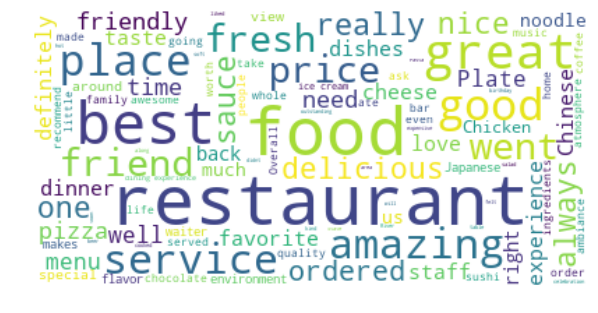

In [0]:
#create a wordclod for positive sentiment
ftext = ''

#decepDF['newreview'][1]

for i in range(len(decepDF)):
  if decepDF['sentiment'][i] == 'p':
    ftext = ftext + decepDF['newreview'][i]
    
    
    
generate_wordcloud(ftext)

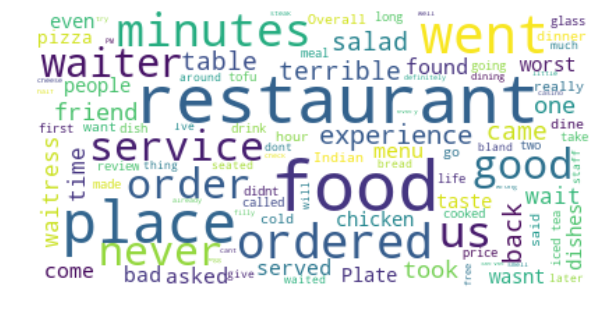

In [0]:
#create a wordclod for nagative sentiment
ftext = ''

#decepDF['newreview'][1]

for i in range(len(decepDF)):
  if decepDF['sentiment'][i] == 'n':
    ftext = ftext + decepDF['newreview'][i]
    
    
    
generate_wordcloud(ftext)

In [0]:

## build a list od string to pass into the vectorizer

myList = []

for i in range(len(decepDF)):
  myList.append(decepDF['newreview'][i])
  
  



MycountVect = CountVectorizer(input="content")

CV = MycountVect.fit_transform(myList)

MyColumnNames=MycountVect.get_feature_names()
VectorizedDF_Text=pd.DataFrame(CV.toarray(),columns=MyColumnNames)
## Note - this DF starts at row 0 (not 1)
## My labels start at 1 so I need to shift by 1
print(VectorizedDF_Text.head())





   10  100  15  16  20  25  2nd  30  50  5pm  ...  yeah  yelp  yesterday  \
0   0    0   0   0   0   0    0   0   0    0  ...     0     0          0   
1   0    0   0   0   0   0    0   0   0    0  ...     0     0          0   
2   0    0   0   0   0   0    0   0   0    0  ...     0     0          0   
3   0    0   0   0   0   0    0   0   0    0  ...     0     0          0   
4   0    0   0   0   0   0    0   0   0    0  ...     0     0          0   

   york  you  youll  your  youre  yourself  yue  
0     0    2      0     0      0         0    0  
1     0    0      0     0      0         0    0  
2     0    0      0     0      0         0    0  
3     0    0      0     0      0         0    0  
4     0    0      0     0      0         0    0  

[5 rows x 1459 columns]


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer


doc_vectorizer = TfidfVectorizer(encoding='latin-1', use_idf=True, min_df=1, stop_words='english')

vecs = doc_vectorizer.fit_transform(myList)

MyColumnNames_tf = doc_vectorizer.get_feature_names()

VectorizedDF_tf_idf =pd.DataFrame(vecs.toarray(),columns=MyColumnNames_tf)
## Note - this DF starts at row 0 (not 1)
## My labels start at 1 so I need to shift by 1
print(VectorizedDF_tf_idf.head())





    10  100   15   16   20   25  2nd   30   50  5pm  ...  wrong  wrote  xyz  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0  0.0   

   yeah  yelp  yesterday  york  youll  youre  yue  
0   0.0   0.0        0.0   0.0    0.0    0.0  0.0  
1   0.0   0.0        0.0   0.0    0.0    0.0  0.0  
2   0.0   0.0        0.0   0.0    0.0    0.0  0.0  
3   0.0   0.0        0.0   0.0    0.0    0.0  0.0  
4   0.0   0.0        0.0   0.0    0.0    0.0  0.0  

[5 rows x 1267 columns]


In [0]:
VectorizedDF_Text['lie'] = decepDF['lie'].values

VectorizedDF_tf_idf['lie'] = decepDF['lie'].values

In [0]:
VectorizedDF_tf_idf.head()

,10,100,15,16,20,25,2nd,30,50,5pm,...,wrote,xyz,yeah,yelp,yesterday,york,youll,youre,yue,lie
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,f
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,f
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,f
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,f
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,f


In [0]:
VectorizedDF_Text.head()

,10,100,15,16,20,25,2nd,30,50,5pm,...,yelp,yesterday,york,you,youll,your,youre,yourself,yue,lie
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,f
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,f
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,f
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,f
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,f


In [0]:
## add sentiment

VectorizedDF_Text['sentiment'] = decepDF['sentiment'].values
VectorizedDF_tf_idf['sentiment'] = decepDF['sentiment'].values
VectorizedDF_Text.head()

,10,100,15,16,20,25,2nd,30,50,5pm,...,yesterday,york,you,youll,your,youre,yourself,yue,lie,sentiment
0,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,f,n
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,f,n
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,f,n
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,f,n
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,f,n


In [0]:
VectorizedDF_tf_idf.head()

,10,100,15,16,20,25,2nd,30,50,5pm,...,xyz,yeah,yelp,yesterday,york,youll,youre,yue,lie,sentiment
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,f,n
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,f,n
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,f,n
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,f,n
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,f,n


In [0]:
## create a train test split

### First create Train and Test Sets.  < ----!!!!!!!!!!!!!!!!!!!

NegSent_DF = VectorizedDF_Text[(VectorizedDF_Text["sentiment"] == "n")]
PosSent_DF = VectorizedDF_Text[(VectorizedDF_Text["sentiment"] == "p")]


## Create the testing set - grab a sample from the training set. 
## Be careful. Notice that right now, our train set is sorted by label.
## If your train set is large enough, you can take a random sample.
from sklearn.model_selection import train_test_split

TrainNegDF, TestNegDF = train_test_split(NegSent_DF, test_size=0.3)
TrainPosDF, TestPosDF = train_test_split(PosSent_DF, test_size=0.3)

TrainDF = pd.concat([TrainNegDF, TrainPosDF])
TestDF = pd.concat([TestNegDF, TestPosDF])

# %%


In [0]:
## create a train test split

### First create Train and Test Sets.  < ----!!!!!!!!!!!!!!!!!!!

NegSent_DF = VectorizedDF_tf_idf[(VectorizedDF_tf_idf["sentiment"] == "n")]
PosSent_DF = VectorizedDF_tf_idf[(VectorizedDF_tf_idf["sentiment"] == "p")]


## Create the testing set - grab a sample from the training set. 
## Be careful. Notice that right now, our train set is sorted by label.
## If your train set is large enough, you can take a random sample.
from sklearn.model_selection import train_test_split

TrainNegDF, TestNegDF = train_test_split(NegSent_DF, test_size=0.3)
TrainPosDF, TestPosDF = train_test_split(PosSent_DF, test_size=0.3)

TrainDF_idf = pd.concat([TrainNegDF, TrainPosDF])
TestDF_idf = pd.concat([TestNegDF, TestPosDF])

# %%

In [0]:
TrainDF.head()

,10,100,15,16,20,25,2nd,30,50,5pm,...,yesterday,york,you,youll,your,youre,yourself,yue,lie,sentiment
26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,t,n
25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,t,n
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,f,n
29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,t,n
22,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,f,n


In [0]:
TrainDF_idf.head()

,10,100,15,16,20,25,2nd,30,50,5pm,...,xyz,yeah,yelp,yesterday,york,youll,youre,yue,lie,sentiment
16,0.0,0.185527,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,f,n
45,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,t,n
12,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,f,n
43,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.217968,0.0,0.0,0.0,t,n
19,0.0,0.000000,0.082314,0.0,0.0,0.097566,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,f,n


In [0]:
TrainDF.shape

(64, 1461)

In [0]:
TestDF.shape

(28, 1461)

In [0]:
## IMPORTANT - YOU CANNOT LEAVE LABELS ON THE TEST SET
## Save labels
TestLabelsSentiment=TestDF["sentiment"]
TestLabelsLie=TestDF["lie"]

TrainLabelsSentiment = TrainDF['sentiment']
TrainLabelsLie = TrainDF['lie']
#print(TestLabels)


## remove labels
TestDF = TestDF.drop(["sentiment"], axis=1)
TestDF = TestDF.drop(["lie"], axis=1)
TrainDF = TrainDF.drop(["lie"], axis=1)
TrainDF = TrainDF.drop(["sentiment"], axis=1)
print(TestDF.head())

    10  100  15  16  20  25  2nd  30  50  5pm  ...  yeah  yelp  yesterday  \
2    0    0   0   0   0   0    0   0   0    0  ...     0     0          0   
33   0    0   0   0   0   0    0   0   0    0  ...     0     0          0   
27   0    0   0   0   0   0    0   0   0    0  ...     0     0          0   
14   0    0   2   0   1   0    0   0   0    0  ...     0     0          0   
43   0    0   0   0   0   0    0   0   0    0  ...     0     0          0   

    york  you  youll  your  youre  yourself  yue  
2      0    0      0     0      0         0    0  
33     0    0      0     0      0         0    0  
27     0    0      0     0      0         0    0  
14     0    1      0     0      0         0    0  
43     1    0      0     0      0         0    0  

[5 rows x 1459 columns]


In [0]:
## IMPORTANT - YOU CANNOT LEAVE LABELS ON THE TEST SET
## Save labels
TestLabelsSentiment_idf=TestDF_idf["sentiment"]
TestLabelsLie_idf=TestDF_idf["lie"]

TrainLabelsSentiment_idf = TrainDF_idf['sentiment']
TrainLabelsLie_idf = TrainDF_idf['lie']
#print(TestLabels)


## remove labels
TestDF_idf = TestDF_idf.drop(["sentiment"], axis=1)
TestDF_idf = TestDF_idf.drop(["lie"], axis=1)
TrainDF_idf = TrainDF_idf.drop(["lie"], axis=1)
TrainDF_idf = TrainDF_idf.drop(["sentiment"], axis=1)
print(TestDF_idf.head())

     10  100        15   16   20   25  2nd   30   50  5pm  ...  wrong  wrote  \
1   0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
28  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
13  0.0  0.0  0.080384  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
35  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
10  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   

    xyz  yeah  yelp  yesterday  york  youll  youre  yue  
1   0.0   0.0   0.0        0.0   0.0    0.0    0.0  0.0  
28  0.0   0.0   0.0        0.0   0.0    0.0    0.0  0.0  
13  0.0   0.0   0.0        0.0   0.0    0.0    0.0  0.0  
35  0.0   0.0   0.0        0.0   0.0    0.0    0.0  0.0  
10  0.0   0.0   0.0        0.0   0.0    0.0    0.0  0.0  

[5 rows x 1267 columns]


## Modeling 

### Lie Detection

In [0]:
# model 1

model1 = MultinomialNB()

model1.fit(TrainDF, TrainLabelsLie)

prediction = model1.predict(TestDF)




In [0]:
y_true = (TestLabelsLie).tolist()
y_predict = (prediction).tolist()
labels = ['t', 'f']

cm = confusion_matrix(y_true, y_predict, labels)
print(cm)

[[6 6]
 [9 7]]


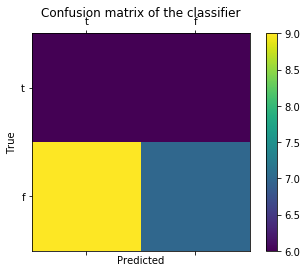

In [0]:
#import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)

ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [0]:
import evaluate_classifier_binary as eval
import inspect

print(inspect.getsource(eval))


eval.evaluate_classifier(prediction, TestLabelsLie)

# -*- coding: utf-8 -*-
"""
Created on Mon Apr 15 18:30:01 2019

@author: teeja

 Evaluating Predictive Accuracy of a Binary Classifier (Python)

"""


def evaluate_classifier(predicted, observed):
    import pandas as pd 
    if(len(predicted) != len(observed)):
        print('\nevaluate_classifier error:',\
             ' predicted and observed must be the same length\n')
        return(None) 
    if(len(set(predicted)) != 2):
        print('\nevaluate_classifier error:',\
              ' predicted must be binary\n')
        return(None)          
    if(len(set(observed)) != 2):
        print('\nevaluate_classifier error:',\
              ' observed must be binary\n')
        return(None)          

    predicted_data = predicted
    observed_data = observed
    input_data = {'predicted': predicted_data,'observed':observed_data}
    input_data_frame = pd.DataFrame(input_data)
    
    cmat = pd.crosstab(input_data_frame['predicted'],\
        input_data_frame['observed']) 
    a = f

(7.0,
 6.0,
 9.0,
 6.0,
 0.4642857142857143,
 0.4375,
 0.5,
 0.5,
 0.5384615384615384,
 0.49489795918367346,
 -0.060606060606060566)

In [0]:
# feature importance


# %%
featLogProb = []
ind = 0
for feats in TrainDF.columns:
    ## the following line takes the difference of the log prob of feature given model
    ## thus it measure the importance of the feature for classification.
    featLogProb.append(abs(model1.feature_log_prob_[1,ind] - model1.feature_log_prob_[0,ind]))
    s = ""
    s += (feats)
    s +="  " 
    s += str(featLogProb[ind])
    s += "\n" 
    print(s)
    ind = ind + 1

10  0.03831087405024469

100  1.1369231627183547

15  1.1369231627183547

16  0.03831087405024469

20  0.4437759821584093

25  0.7314580546101901

2nd  0.6548363065097007

30  0.7314580546101901

50  0.03831087405024469

5pm  0.7314580546101901

6pm  0.03831087405024469

90  0.6548363065097007

abc  0.7314580546101901

about  0.32599294650202637

abruptly  0.03831087405024469

absolutely  0.7314580546101901

acceptable  0.7314580546101901

accord  0.03831087405024469

acknowledge  0.7314580546101901

across  0.6548363065097007

actual  1.0603014146178653

actually  0.6548363065097007

ad  0.6548363065097007

add  1.347983487069646

additiol  0.7314580546101901

adorable  0.6548363065097007

affordable  0.03831087405024469

aforementioned  0.03831087405024469

after  0.521304913885178

afternoon  0.03831087405024469

again  0.4437759821584084

aghast  0.6548363065097007

ago  1.1369231627183547

agreed  0.6548363065097007

air  0.03831087405024469

albert  0.6548363065097007

alfredo  0

In [0]:
#feats_sorted = sorted(featLogProb , reverse = True)
    ## Sort features based on importance!
sort_inds = sorted(range(len(featLogProb)), key=featLogProb.__getitem__, reverse = True)
for i in range(20):
    s = ""
    s += TrainDF.columns[sort_inds[i]]
    s += ":  "
    s += str(featLogProb[sort_inds[i]])
    s += "\n"
    print(s)


plate:  2.2355354513864647

tofu:  1.9075992750050688

meal:  1.8300703432782992

people:  1.6664372181881806

cold:  1.6477487864843452

could:  1.6477487864843452

free:  1.6477487864843452

iced:  1.6477487864843452

outstanding:  1.6477487864843452

tea:  1.6477487864843452

each:  1.5711270383838558

every:  1.5711270383838558

try:  1.5711270383838558

worst:  1.5711270383838558

along:  1.4246052351701355

area:  1.4246052351701355

birthday:  1.4246052351701355

celebration:  1.4246052351701355

chipotle:  1.4246052351701355

didnt:  1.4246052351701355



In [0]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score


#

scores = cross_validate(model1, TrainDF, TrainLabelsLie, cv=10, scoring='accuracy')
np.mean(scores['test_score'])

0.48571428571428565

In [0]:
## model 2

model2 = MultinomialNB()

model2.fit(TrainDF_idf, TrainLabelsLie_idf)

prediction = model2.predict(TestDF_idf)

In [0]:
y_true = (TestLabelsLie_idf).tolist()
y_predict = (prediction).tolist()
labels = ['t', 'f']

cm = confusion_matrix(y_true, y_predict, labels)
print(cm)

[[ 8  2]
 [16  2]]


In [0]:
eval.evaluate_classifier(prediction,TestLabelsLie_idf)

(2.0,
 2.0,
 16.0,
 8.0,
 0.35714285714285715,
 0.1111111111111111,
 0.8,
 0.2,
 0.5,
 0.3979591836734694,
 -0.06779661016949151)

In [0]:
# feature importance


# %%
featLogProb = []
ind = 0
for feats in TrainDF_idf.columns:
    ## the following line takes the difference of the log prob of feature given model
    ## thus it measure the importance of the feature for classification.
    featLogProb.append(abs(model2.feature_log_prob_[1,ind] - model2.feature_log_prob_[0,ind]))
    s = ""
    s += (feats)
    s +="  " 
    s += str(featLogProb[ind])
    s += "\n" 
    print(s)
    ind = ind + 1

10  0.016206828346719604

100  0.19231751010346265

15  0.2241779263555479

16  0.2023211743582758

20  0.21250139759890363

25  0.25751409423117

2nd  0.1730470162051585

30  0.13678041220747605

50  0.09071398179825874

5pm  0.022130208397572737

6pm  0.011468054105757908

90  0.17373449121460727

abc  0.022130208397572737

abruptly  0.022130208397572737

absolutely  0.022130208397572737

acceptable  0.20652657111947548

accord  0.2023211743582758

acknowledge  0.17279618114254447

actual  0.09332112119034353

actually  0.022130208397572737

ad  0.17989661373520072

add  0.32091599940543425

additiol  0.1859744825387173

adorable  0.037260658080260356

affordable  0.17982568743286542

aforementioned  0.022130208397572737

afternoon  0.14923558495613953

aghast  0.022130208397572737

ago  0.022130208397572737

agreed  0.12389607001611846

air  0.12062094851157834

albert  0.1542306980911805

alfredo  0.12389607001611846

amazing  0.013693377437032694

ambiance  0.20795328402596258

am

In [0]:
#feats_sorted = sorted(featLogProb , reverse = True)
    ## Sort features based on importance!
sort_inds = sorted(range(len(featLogProb)), key=featLogProb.__getitem__, reverse = True)
for i in range(20):
    s = ""
    s += TrainDF_idf.columns[sort_inds[i]]
    s += ":  "
    s += str(featLogProb[sort_inds[i]])
    s += "\n"
    print(s)

environment:  0.7426463940065959

place:  0.56030718647136

bring:  0.5340991663697938

coffee:  0.5302970037646704

cold:  0.5205698598010198

iced:  0.5144141311462151

tea:  0.5144141311462151

bar:  0.5139216903235466

birthday:  0.509486003184012

tables:  0.5043206027550413

chocolate:  0.49298942504702303

smile:  0.4825650546601796

cream:  0.4809507114184246

big:  0.47194442436372697

cooked:  0.4711178616213214

good:  0.4676793229216294

nice:  0.46612757229680657

ice:  0.4609487222931383

area:  0.45992613515930003

expensive:  0.4598233842522035



In [0]:

scores = cross_validate(model1, TrainDF_idf, TrainLabelsLie_idf, cv=10, scoring='accuracy')
np.mean(scores['test_score'])

0.6390476190476189

### Sentiment

In [0]:
# model 3

model3 = MultinomialNB()

model3.fit(TrainDF, TrainLabelsSentiment)

prediction = model3.predict(TestDF)


In [0]:
cm = confusion_matrix(TestLabelsSentiment,prediction)
print(cm)

[[13  1]
 [ 3 11]]


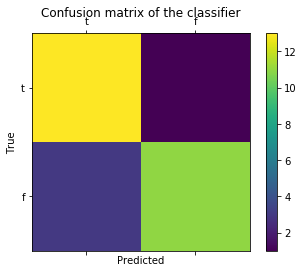

In [0]:
#import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)

ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [0]:
# feature importance


# %%
featLogProb = []
ind = 0
for feats in TrainDF.columns:
    ## the following line takes the difference of the log prob of feature given model
    ## thus it measure the importance of the feature for classification.
    featLogProb.append(abs(model3.feature_log_prob_[1,ind] - model3.feature_log_prob_[0,ind]))
    s = ""
    s += (feats)
    s +="  " 
    s += str(featLogProb[ind])
    s += "\n" 
    print(s)
    ind = ind + 1

10  0.4831277923114552

100  0.2100193882484902

15  0.2100193882484902

16  0.2100193882484902

20  1.1762749728714006

25  0.4831277923114552

2nd  0.9031665688084356

30  0.4831277923114552

50  1.3086316769166002

5pm  0.9031665688084356

6pm  0.8885929004196198

90  0.4831277923114552

abc  0.4831277923114552

about  0.3777672766536293

abruptly  0.2100193882484902

absolutely  0.9031665688084356

acceptable  0.4831277923114552

accord  0.2100193882484902

acknowledge  0.4831277923114552

across  0.4831277923114552

actual  0.8885929004196198

actually  0.4831277923114552

ad  0.9031665688084356

add  0.1954457198596744

additiol  0.4831277923114552

adorable  0.4831277923114552

affordable  0.2100193882484902

aforementioned  0.2100193882484902

after  0.34959639968693246

afternoon  0.2100193882484902

again  0.2100193882484902

aghast  0.4831277923114552

ago  0.2100193882484902

agreed  0.9031665688084356

air  0.2100193882484902

albert  0.9031665688084356

alfredo  0.9031665

In [0]:
#feats_sorted = sorted(featLogProb , reverse = True)
    ## Sort features based on importance!
sort_inds = sorted(range(len(featLogProb)), key=featLogProb.__getitem__, reverse = True)
for i in range(20):
    s = ""
    s += TrainDF.columns[sort_inds[i]]
    s += ":  "
    s += str(featLogProb[sort_inds[i]])
    s += "\n"
    print(s)

amazing:  2.7749687457100265

no:  2.2748872615395097

terrible:  2.2748872615395097

always:  2.1559295373038037

took:  2.0925657047455557

waiter:  2.0925657047455557

best:  2.0558460787468205

restaurants:  2.0017788574765447

great:  1.9446204436365964

asked:  1.869422153431346

flavors:  1.8194573006825907

ingredients:  1.8194573006825907

right:  1.8194573006825907

sushi:  1.8194573006825907

indian:  1.7358907608068233

tofu:  1.7358907608068233

along:  1.596313749368381

atmosphere:  1.596313749368381

birthday:  1.596313749368381

cafe:  1.596313749368381



In [0]:
scores = cross_validate(model3, TrainDF, TrainLabelsSentiment, cv=10, scoring='accuracy')
scores

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([0.00803876, 0.00571513, 0.00607896, 0.00450945, 0.00555086,
        0.00461841, 0.00432777, 0.00406766, 0.00435615, 0.00439429]),
 'score_time': array([0.00462818, 0.00177383, 0.00172734, 0.00162363, 0.00243759,
        0.00179601, 0.00142813, 0.00141954, 0.00149655, 0.00150394]),
 'test_score': array([0.875     , 0.75      , 0.83333333, 1.        , 0.83333333,
        0.66666667, 1.        , 0.5       , 0.83333333, 0.83333333]),
 'train_score': array([0.96428571, 0.98214286, 0.96551724, 0.98275862, 0.96551724,
        0.96551724, 0.96551724, 0.98275862, 0.98275862, 0.96551724])}

In [0]:
np.mean(scores['test_score'])

0.8125

In [0]:
scores['test_score']

array([0.875     , 0.75      , 0.83333333, 1.        , 0.83333333,
       0.66666667, 1.        , 0.5       , 0.83333333, 0.83333333])

In [0]:
# model 4

model4 = MultinomialNB()

model4.fit(TrainDF_idf, TrainLabelsSentiment_idf)

prediction = model4.predict(TestDF_idf)

In [0]:
cm = confusion_matrix(TestLabelsSentiment_idf,prediction)
print(cm)

[[11  3]
 [ 2 12]]


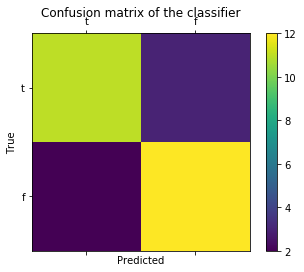

In [0]:
#import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)

ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [0]:
scores = cross_validate(model4, TrainDF_idf, TrainLabelsLie_idf, cv=10, scoring='accuracy')
np.mean(scores['test_score'])

0.6390476190476189

In [0]:
# feature importance


# %%
featLogProb = []
ind = 0
for feats in TrainDF_idf.columns:
    ## the following line takes the difference of the log prob of feature given model
    ## thus it measure the importance of the feature for classification.
    featLogProb.append(abs(model4.feature_log_prob_[1,ind] - model4.feature_log_prob_[0,ind]))
    s = ""
    s += (feats)
    s +="  " 
    s += str(featLogProb[ind])
    s += "\n" 
    print(s)
    ind = ind + 1

10  0.28487409025335175

100  0.15539562943015017

15  0.18725604568223542

16  0.1949826382364428

20  0.26231664621321116

25  0.22059221355785752

2nd  0.20996889687847098

30  0.09985853153416357

50  0.12763586247157122

5pm  0.014791672275739742

6pm  0.3100139593880824

90  0.18107302733644026

abc  0.014791672275739742

abruptly  0.014791672275739742

absolutely  0.014791672275739742

acceptable  0.169604690446163

accord  0.1949826382364428

acknowledge  0.135874300469232

actual  0.10065965731217652

actually  0.014791672275739742

ad  0.2168184944085132

add  0.13977177326723833

additiol  0.1490526018654048

adorable  0.04459919420209335

affordable  0.2167475681061779

aforementioned  0.014791672275739742

afternoon  0.186157465629452

aghast  0.014791672275739742

ago  0.014791672275739742

agreed  0.16081795068943094

air  0.15754282918489082

albert  0.191152578764493

alfredo  0.16081795068943094

amazing  0.8270709331617594

ambiance  0.26483728920145655

ambient  0.1

In [0]:
#feats_sorted = sorted(featLogProb , reverse = True)
    ## Sort features based on importance!
sort_inds = sorted(range(len(featLogProb)), key=featLogProb.__getitem__, reverse = True)
for i in range(20):
    s = ""
    s += TrainDF_idf.columns[sort_inds[i]]
    s += ":  "
    s += str(featLogProb[sort_inds[i]])
    s += "\n"
    print(s)

best:  1.0042461858525442

great:  0.8705657148761992

minutes:  0.836711688629336

amazing:  0.8270709331617594

terrible:  0.7611413944329719

friendly:  0.7525433598036138

noodle:  0.6229894174653454

bad:  0.6214885096792404

took:  0.6009998047067651

coffee:  0.5672188844379829

indian:  0.5587491860856293

home:  0.5584216731021501

nice:  0.5525373386184267

fresh:  0.551502314361608

smile:  0.5194869353334921

feel:  0.5081895616440866

birthday:  0.502147467062179

makes:  0.4895563751002028

chocolate:  0.48565088892519004

cold:  0.4836479791277073

